In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
traffic_tickets = pd.read_csv('./Traffic_Tickets_Issued__Four_Year_Window.csv')

C:\Users\dacrands\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


*This error will be addressed in the next section*

## Data overview and cleaning

In [3]:
"Total rows: {:,}".format(len(traffic_tickets))

'Total rows: 6,298,032'

In [5]:
# View dframe columns
for col in traffic_tickets.columns:
    print(col + "\r")

Violation Charged Code
Violation Description
Violation Year
Violation Month
Violation Day of Week
Age at Violation
Gender
State of License
Police Agency
Court
Source


In [6]:
# Create new dframe with cols of interest
traffic_tickets = traffic_tickets[[
    "Violation Description", 
    "Violation Year", 
    "Violation Month",
    "Violation Day of Week", 
    "Age at Violation", 
    "State of License", 
    "Gender",
]]

In [7]:
traffic_tickets.columns

Index(['Violation Description', 'Violation Year', 'Violation Month',
       'Violation Day of Week', 'Age at Violation', 'State of License',
       'Gender'],
      dtype='object')

In [8]:
traffic_tickets = traffic_tickets.rename(columns={
    'Violation Description': 'Violation', 
    'Violation Year': 'Year', 
    'Violation Day of Week': 'DayOfWeek',
    'Age at Violation': 'Age', 
    'State of License': 'State'
})

In [9]:
traffic_tickets.head()

,Violation,Year,Violation Month,DayOfWeek,Age,State,Gender
0,UNINSPECTED MOTOR VEHICLE,2016,3.0,TUESDAY,21.0,NEW YORK,M
1,SPEED OVER 55 ZONE,2016,3.0,SATURDAY,18.0,NEW YORK,F
2,SPEED OVER 55 ZONE,2016,2.0,WEDNESDAY,55.0,NEW YORK,M
3,SPEED IN ZONE,2016,2.0,SUNDAY,41.0,NEW YORK,M
4,SPEED OVER 55 ZONE,2016,1.0,THURSDAY,25.0,NEW YORK,M


In [10]:
traffic_tickets.tail()

,Violation,Year,Violation Month,DayOfWeek,Age,State,Gender
6298027,OPER MV WHILE USING PORTABLE ELEC DEV,20{,NaN,NaN,NaN,NaN,NaN
6298028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6298029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6298030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6298031,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It seems there are some crummy values at in this dframe, let's remove them.

In [11]:
traffic_tickets = traffic_tickets[:6298027]

traffic_tickets.tail()

,Violation,Year,Violation Month,DayOfWeek,Age,State,Gender
6298022,OPERATING MV MOBILE PHONE,2017,8.0,MONDAY,29.0,NEW YORK,M
6298023,PLATE MISSING/INSECURE/DIRTY,2017,8.0,MONDAY,46.0,NEW YORK,M
6298024,DISOBEYED TRAFFIC DEVICE,2017,8.0,MONDAY,22.0,MARYLAND,M
6298025,IMPROPER SIGNAL,2017,8.0,MONDAY,36.0,NEW JERSEY,M
6298026,COM VEH ON PKWAY NYC,2017,8.0,MONDAY,42.0,NEW YORK,M


## Top 10 Traffic Violations

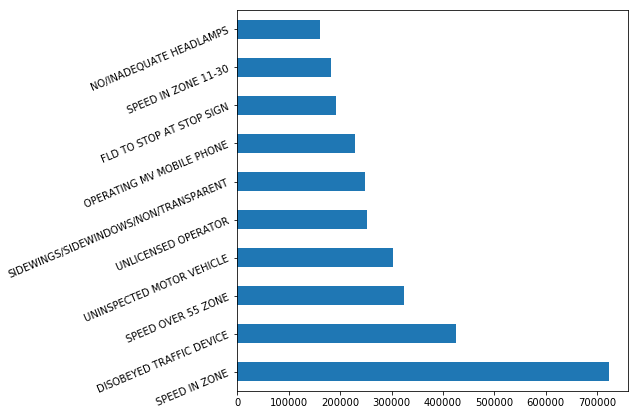

In [12]:
traffic_tickets.Violation.value_counts()[:10].plot(kind="barh", figsize=(7,7), rot=23)

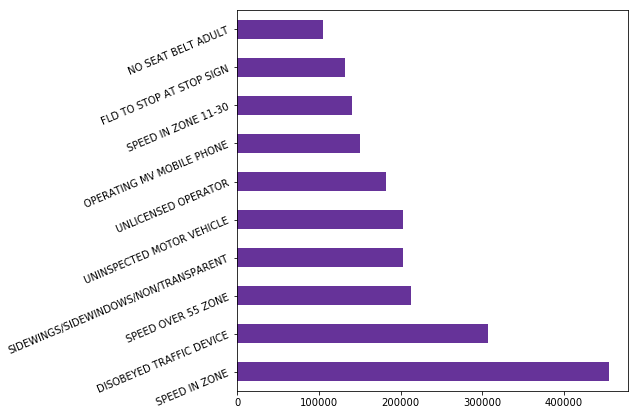

In [13]:
traffic_tickets.loc[traffic_tickets.Gender == "M"] \
    .Violation \
    .value_counts()[:10] \
    .plot(kind="barh", figsize=(7,7), rot=23, color="#663399") 

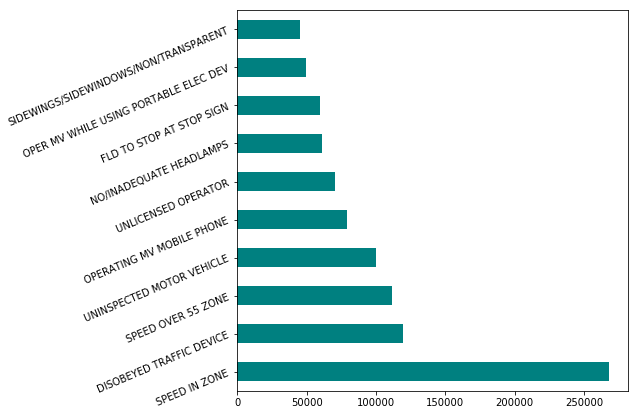

In [64]:
traffic_tickets.loc[traffic_tickets.Gender == "F"] \
    .Violation \
    .value_counts()[:10] \
    .plot(kind="barh", figsize=(7,7), rot=23, color="teal")

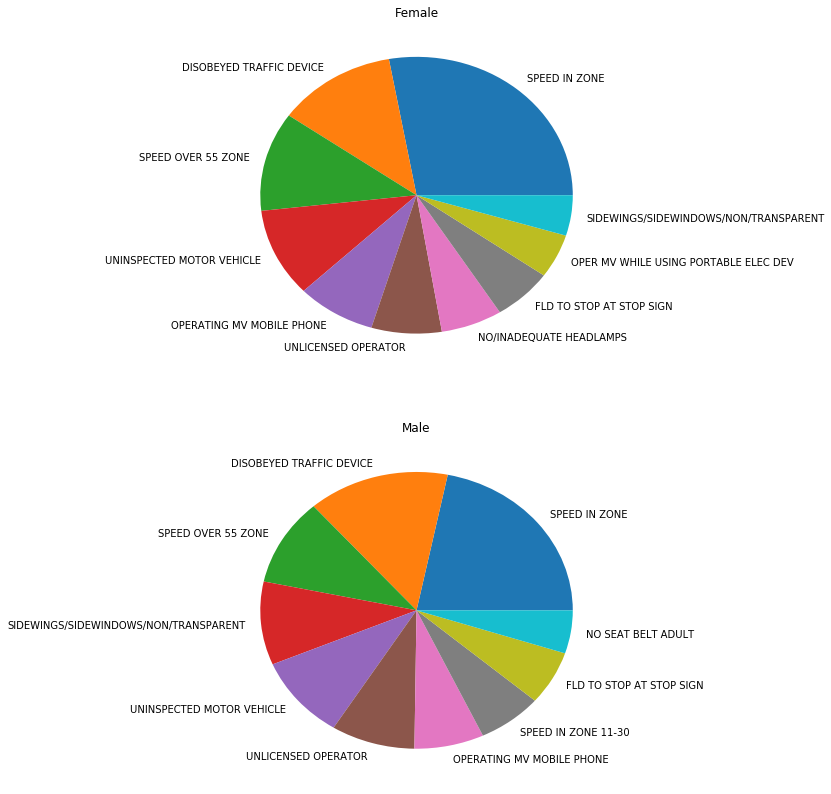

In [96]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(7, 14))
traffic_tickets.loc[traffic_tickets.Gender == "F"] \
    .Violation \
    .value_counts()[:10] \
    .plot(kind="pie", ax=ax1, rot=23, title="Female")

traffic_tickets.loc[traffic_tickets.Gender == "M"] \
    .Violation \
    .value_counts()[:10] \
    .plot(kind="pie", ax=ax2, rot=23, title="Male") 
    
ax1.set_ylabel('')
ax2.set_ylabel('')

In [16]:
age_set = set(traffic_tickets.Age)

In [17]:
len(age_set)

67372

In [19]:
traffic_tickets.Age.mean()

36.63150639531291

In [20]:
traffic_tickets.Age.median()

34.0

In [21]:
traffic_tickets.Age.mode()

0    24.0
dtype: float64

(array([  3.58643000e+05,   8.37276000e+05,   8.56307000e+05,
          7.24647000e+05,   6.10411000e+05,   5.14837000e+05,
          4.42856000e+05,   4.30423000e+05,   3.94801000e+05,
          3.49807000e+05,   2.68862000e+05,   1.83934000e+05,
          1.17310000e+05,   6.84470000e+04,   3.71080000e+04,
          1.87360000e+04,   9.38500000e+03,   4.71200000e+03,
          1.71700000e+03,   5.16000000e+02]),
 array([ 16.  ,  19.95,  23.9 ,  27.85,  31.8 ,  35.75,  39.7 ,  43.65,
         47.6 ,  51.55,  55.5 ,  59.45,  63.4 ,  67.35,  71.3 ,  75.25,
         79.2 ,  83.15,  87.1 ,  91.05,  95.  ]),
 <a list of 20 Patch objects>)

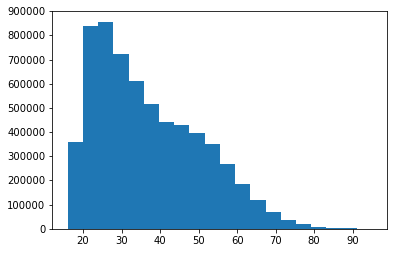

In [22]:
plt.hist(traffic_tickets.Age.dropna(), bins=20)

In [27]:
traffic_tickets.Gender.value_counts()

M    4433132
F    1802023
C      62872
Name: Gender, dtype: int64

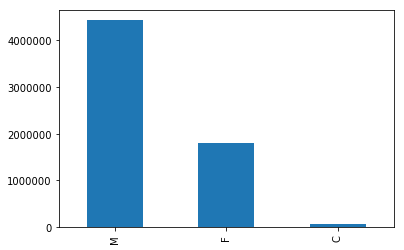

In [44]:
traffic_tickets.Gender.value_counts().plot(kind="bar")

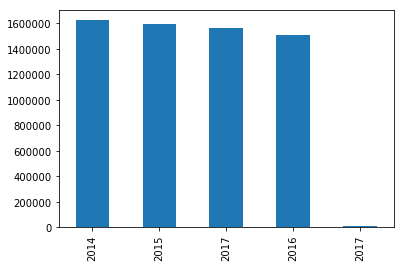

In [45]:
traffic_tickets.Year.value_counts().plot(kind="bar")

In [47]:
set(traffic_tickets.Year)

{2016, 2017, '2017', 2014, 2015}

Well, there seems to be a string in there, so let's convert that to an int.

In [49]:
temp_df = traffic_tickets.replace(to_replace="2017", value=2017)
set(temp_df.Year)

{2014, 2015, 2016, 2017}

Ok, our little test worked, now let's reassign our dframe to this clean one

In [50]:
traffic_tickets = traffic_tickets.replace(to_replace="2017", value=2017)

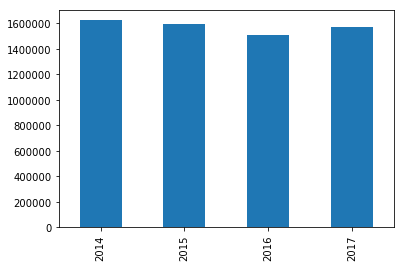

In [67]:
traffic_tickets.Year.value_counts()[[2014, 2015, 2016, 2017]].plot(kind="bar")